# Sistemas Inteligentes

## Exercício Computacional 4 - Agrupamento (Clusterização)

### Identificação do Aluno

#### Nome Completo

Dimitri Leandro de Oliveira Silva

### Dataset

#### Nome do Dataset

Wine Recognition

#### Características do Dataset

O dataset foi criado a partir de análises químicas de vinhos cultivados na mesma região da Itália por três diferentes cultivadores.

O dataset apresenta 178 vinhos separados em três classes distintas. Cada vinho possui treze características que são mostradas na tabela abaixo (por não saber a tradução exata de algumas das features, preferiu-se exibi-las em inglês):

<br>
<table>
    <tr>
        <th>FEATURE</th>
        <th>MÍN</th>
        <th>MÁX</th>
        <th>MÉDIA</th>
        <th>DP</th>
    <tr>
        <th>Alcohol</th> 
        <th>11.0</th> 
        <th>14.8</th> 
        <th>13.0</th> 
        <th>0.8</th>
    </tr>
    <tr>
        <th>Malic Acid</th> 
        <th>0.74</th> 
        <th>5.80</th> 
        <th>2.34</th> 
        <th>1.12</th>
    </tr>
    <tr>
        <th>Ash</th> 
        <th>1.36</th> 
        <th>3.23</th> 
        <th>2.36</th> 
        <th>0.27</th>
    </tr>
    <tr>
        <th>Alcalinity of Ash</th> 
        <th>10.6</th> 
        <th>30.0</th> 
        <th>19.5</th> 
        <th>3.3</th>
    </tr>
    <tr>
        <th>Magnesium</th> 
        <th>70.0</th> 
        <th>62.0</th> 
        <th>99.7</th> 
        <th>14.3</th>
    </tr>
    <tr>
        <th>Total Phenols</th> 
        <th>0.98</th> 
        <th>3.88</th> 
        <th>2.29</th> 
        <th>0.63</th>
    </tr>
    <tr>
        <th>Flavanoids</th> 
        <th>0.34</th> 
        <th>5.08</th> 
        <th>2.03</th> 
        <th>1.00</th>
    </tr>
    <tr>
        <th>Nonflavanoid Phenols</th> 
        <th>0.13</th> 
        <th>0.66</th> 
        <th>0.36</th> 
        <th>0.12</th>
    </tr>
    <tr>
        <th>Proanthocyanins</th> 
        <th>0.41</th> 
        <th>3.58</th> 
        <th>1.59</th> 
        <th>0.57</th>
    </tr>
    <tr>
        <th>Colour Intensity</th> 
        <th>1.3</th> 
        <th>13.0</th> 
        <th>5.1</th> 
        <th>2.3</th>
    </tr>
    <tr>
        <th>Hue</th> 
        <th>0.48</th> 
        <th>1.71</th> 
        <th>0.96</th> 
        <th>0.23</th>
    </tr>
    <tr>
        <th>OD280/OD315 of diluted wines</th> 
        <th>1.27</th> 
        <th>4.00</th> 
        <th>2.61</th> 
        <th>0.71</th>
    </tr>
    <tr>
        <th>Proline</th>
        <th>278</th>
        <th>1680</th>
        <th>746</th>
        <th>315</th>
    </tr>
</table>

#### Fonte do Dataset

Forina, M. et al, 
Institute of Pharmaceutical and Food Analysis and Technologies,
Genoa, Italy.

Página do dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

Todo o dataset pode ser visto nesse link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

OBS: Todas as informações descritas nessa seção podem ser acessadas rodando **print(load_wine().DESCR)**

#### Objetivos

Estudar as técnicas de clusterização K-Means e Affinity Propagation, bem como algumas métricas utilizadas para avalia-las.

Esses algorítmos proporcionarão separar os vinhos do dataset de acordo com suas características para que seja possível entender melhor como a clusterização se difere das demais técnicas abordadas nesse curso.

## Desenvolvimento

Primeiro, fazendo as importações necessárias:

In [1]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap, TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, train_test_split as tts
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.utils import shuffle
from scipy.spatial import distance
from sklearn.model_selection import LeaveOneOut
from math import pow
from random import randint
from scipy import stats
from IPython.display import HTML, display

In [2]:
#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [7, 4], 
          'axes.labelsize': 12,
          'axes.titlesize':16, 
          'font.size': 12,
          'legend.fontsize': 12, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

Carregando o dataset:

In [3]:
dataset = load_wine()

x = dataset.data
y = dataset.target

Verificando se as dimensões de x e y estão de acordo:

In [4]:
print(x.shape)
print(y.shape)

(178, 13)
(178,)


### Número Ótimo de Clusters

Apesar de saber que o dataset original apresenta vinhos de três diferentes classes, para começar o exercício, pode-se tentar usar algumas técnicas para avaliar o numero ótimo de clusters. Com isso, será possível colocar em prática alguns métodos vistos em aula.

Nesse exercício computacional, serão utilizados os algoritmos KMeans e Affinity Propagation. Para definir o número ótimos de clusters, será utilizado somente o KMeans, já que não é possível definir o número desejado de clusters no Affinity Propagation.

https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/

#### Elbow Method

Esse método mostra o erro quadrático médio das distâncias de cada ponto até o centroide de seu cluster em função do número de clusters utilizado. Quando a inclinação da reta mudar abruptamente (joelho), considera-se ter atingido um bom número de clusters.

Para realizar esse método, ao invés de utilizar **erro quadrático médio** em função do número de clusters, será utilizada a **inércia**, já que ela é a soma quadrática das distâncias entre os pontos e seus centróides.

Referências: 

https://pythonprogramminglanguage.com/kmeans-elbow-method/

https://en.wikipedia.org/wiki/Elbow_method_(clustering)

https://stats.stackexchange.com/questions/78313/clustering-inertia-formula-in-scikit-learn

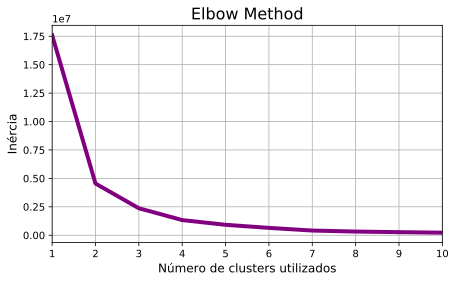

In [5]:
#Criando a lista de inércias para que seja possível plotar depois
inercias = []

#Rodando o kMeans com TODOS os dados do dataset de 1 a 10 clusters
for k in range(1,11):
    objKMeans = KMeans(n_clusters=k)
    objKMeans.fit(x)
    inercias.append(objKMeans.inertia_)

# Plotando o resultado
plt.plot(range(1,11), inercias, color='purple', linewidth=4)
plt.xlabel('Número de clusters utilizados')
plt.ylabel('Inércia')
plt.title('Elbow Method')
plt.grid()
plt.xlim(1, 10)
plt.show()

No gráfico acima pode-se perceber um "joelho" discreto quando o número de clusters é 3. Entretanto, quando o número de clusters é 2, percebe-se uma variação ainda maior na inclinação da reta. 

Isso não garante que o número ótimo de clusters é 2, deve-se testar outros métodos a fim de comparar os melhores resultados obtidos e, portanto, definir o número ótimo de clusters.

#### Coeficiente de Silhueta

Diferentemente do método anterior, o coeficiente de silhueta calcula a qualidade de um agrupamento de acordo com a proximidade de cada dado em um mesmo cluster juntamente com o afastamento dos clusters. O valor desse coeficiente pode ir de -1 a +1, sendo ótimo o maior valor possível.

A biblioteca **sklearn** possui uma função de coeficiente de silhueta já implementada que será usada na célula abaixo.

Referências:

https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

https://en.wikipedia.org/wiki/Silhouette_(clustering)

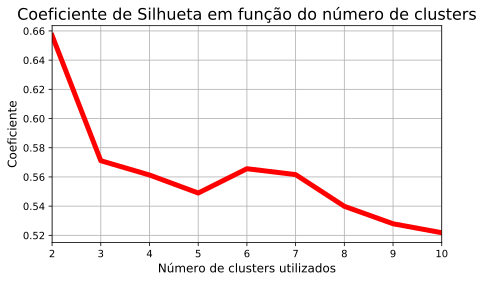

In [6]:
#Criando a lista de coeficientes para que seja possível plotar depois
coeficientes = []

#Rodando o kMeans com TODOS os dados do dataset de 2 a 10 clusters
#(o número mínimo de clusters para usar a função silhouette_score é 2, como mostra a documentação)
for k in range(2,11):
    objKMeans = KMeans(n_clusters=k)
    objKMeans.fit(x)
    coeficienteSilhueta = metrics.silhouette_score(x, objKMeans.labels_, metric='euclidean')
    coeficientes.append(coeficienteSilhueta)

# Plotando o resultado
plt.plot(range(2,11), coeficientes, color='red', linewidth=5)
plt.xlabel('Número de clusters utilizados')
plt.ylabel('Coeficiente')
plt.title('Coeficiente de Silhueta em função do número de clusters')
plt.grid()
plt.xlim(2, 10)
plt.show()                                 

Da mesma forma que a métrica anterior (Elbow Method), o método do Coeficiente de Silhueta também mostra que o melhor número de clusters para esse dataset é dois.

#### Usando o Affinity Propagation para verificar o número ótimo de clusters

O algoritmo Affinity Propagation calcula automaticamente o número de clusters a ser utilizado. A referência utilizada sugere que esse algoritmo pode ser usado para verificar o número de clusters utilizado a fim de comparar esse valor com outras métricas.

Referência: https://medium.com/@aneesha/using-affinity-propagation-to-find-the-number-of-clusters-in-a-dataset-52f5dd3b0760

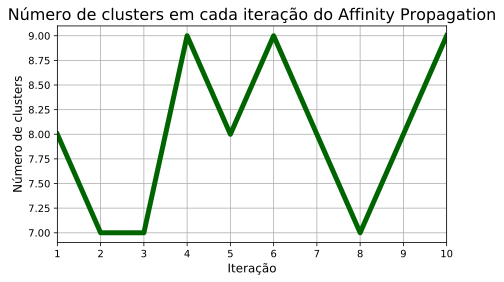

Moda: 8


In [7]:
#Instânciando um objeto KFold com 10 pacotes
objKFold = KFold(n_splits = 10, shuffle=True, random_state=None)

#Vetor que vai guardar quantos clusters foram usados em cada iteração
vetorQtdClusters = []

#Rodando o Affinity Propagation com o KFold
for trainIndex, testIndex in objKFold.split(x):
    xTrain = x[trainIndex]
    objAP = AffinityPropagation().fit(xTrain)
    vetorQtdClusters.append(len(objAP.cluster_centers_indices_))
    
# Plotando o resultado
plt.plot(range(1,11), vetorQtdClusters, color='darkgreen', linewidth=5)
plt.xlabel('Iteração')
plt.ylabel('Número de clusters')
plt.title('Número de clusters em cada iteração do Affinity Propagation')
plt.grid()
plt.xlim(1, 10)
#plt.yticks(np.array([6,7,8,9,10]), ['6','7','8','9','10']) 
plt.show()

#Mostrando a moda
vetorQtdClusters = np.array(vetorQtdClusters)
print("Moda:", "{:d}".format(stats.mode(vetorQtdClusters)[0][0]))

#### WB Index

Outra métrica que pode ser usada para verificar o número ótimo de clusters é o WB Index. Após pesquisar por bibliotecas que possuíssem implementações disponíveis desse método, constatou-se que seria necessário implementa-lo desde o inicio, já que a pesquisa não apresentou resultados.

A referência contém uma boa explicação dessa técnica. Na célula abaixo, implementou-se o algoritmo.

Referência: http://cs.joensuu.fi/sipu/pub/qinpei-thesis.pdf, página 22.

In [8]:
def WBIndex(x, y, centroides):
    ssw = sumSquaresWithin(x, y, centroides)
    ssb = sumSquaresBetween(x, y, centroides)
    return  (len(x) * (ssw/ssb))

def sumSquaresWithin(x, y, centroides):
    
    distanciasAoQuadrado = []
    
    #Primeiro passando de cluster em cluster
    for clusterAtual in range(0, len(centroides)):
        
        #Pra cada cluster eu pego todos os pontos dele
        for index, clusterPontoAtual in enumerate(y):
            if clusterAtual == clusterPontoAtual:
                #Se chegou aqui então eu estou em um ponto do cluster atual
                d = x[index] - centroides[clusterAtual]
                distanciasAoQuadrado.append(d * d)
    
    #Aqui já tenho o vetor distanciasAoQuadrado completo com todos os 
    #pontos em relação aos seus centroides, é só retornar a soma de tudo isso
    distanciasAoQuadrado = np.array(distanciasAoQuadrado)    
    
    return np.sum(distanciasAoQuadrado)

def sumSquaresBetween(x, y, centroides):
    
    #Primeiro, tenho que achar o X médio de TODOS os pontos 
    #(embaixo da equação 3.9 (pág 24) tem uma representação visual desse x médio)
    xMedio = []
    for dimensaoAtual in range(0, x.shape[1]):
        xMedio.append(np.mean(x[:, dimensaoAtual]))
    xMedio = np.array(xMedio)
    
    #Beleza, agr já tenho o xMedio, é só aplicar a equação 3.8 e somar tudo como mostra a equação 3.9
    bs = []
    
    for clusterAtual in range(0, len(centroides)):
        #Preciso saber a quantidade de pontos que existem no cluster atual
        qtdPontosClusterAtual = 0
        for clusterPontoAtual in y:
            if clusterPontoAtual == clusterAtual:
                qtdPontosClusterAtual += 1
        
        #agora aplico a equação 3.8...
        d = centroides[clusterAtual] - xMedio
        bs.append(qtdPontosClusterAtual * (d * d))
        
    #...e somo todos os B's como mostra a equação 3.9
    bs = np.array(bs)
    
    return np.sum(bs)

Na célula abaixo, assim como com as outras métricas, o WB Index será calculado com diferentes números de clusters.

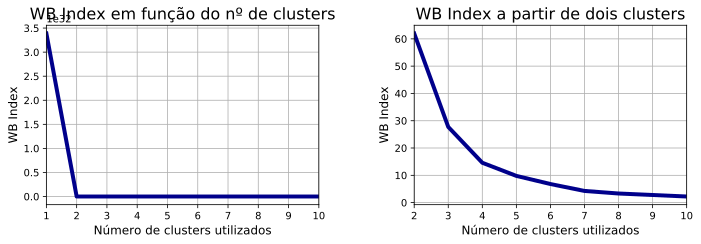

In [9]:
#Criando a lista de coeficientes para que seja possível plotar depois
WBs = []

#Rodando o kMeans com TODOS os dados do dataset de 2 a 10 clusters
for k in range(1,11):
    objKMeans = KMeans(n_clusters=k)
    objKMeans.fit(x)
    WBs.append(WBIndex(x, objKMeans.labels_, objKMeans.cluster_centers_))

#Plotando o resultado
f, axarr = plt.subplots(1, 2)

#MOSTRANDO O WB INDEX COM 1 CLUSTER
axarr[0].plot(range(1,11), WBs, color='darkblue', linewidth=4)
axarr[0].set_xlabel('Número de clusters utilizados')
axarr[0].set_ylabel('WB Index')
axarr[0].set_title('WB Index em função do nº de clusters')
axarr[0].set_xlim(1, 10)
axarr[0].grid()
def WBIndex(x, y, centroides):
    ssw = sumSquaresWithin(x, y, centroides)
    ssb = sumSquaresBetween(x, y, centroides)
    return  (len(x) * (ssw/ssb))

def sumSquaresWithin(x, y, centroides):
    
    distanciasAoQuadrado = []
    
    #Primeiro passando de cluster em cluster
    for clusterAtual in range(0, len(centroides)):
        
        #Pra cada cluster eu pego todos os pontos dele
        for index, clusterPontoAtual in enumerate(y):
            if clusterAtual == clusterPontoAtual:
                #Se chegou aqui então eu estou em um ponto do cluster atual
                d = x[index] - centroides[clusterAtual]
                distanciasAoQuadrado.append(d * d)
    
    #Aqui já tenho o vetor distanciasAoQuadrado completo com todos os 
    #pontos em relação aos seus centroides, é só retornar a soma de tudo isso
    distanciasAoQuadrado = np.array(distanciasAoQuadrado)    
    
    return np.sum(distanciasAoQuadrado)

def sumSquaresBetween(x, y, centroides):
    
    #Primeiro, tenho que achar o X médio de TODOS os pontos 
    #(embaixo da equação 3.9 (pág 24) tem uma representação visual desse x médio)
    xMedio = []
    for dimensaoAtual in range(0, x.shape[1]):
        xMedio.append(np.mean(x[:, dimensaoAtual]))
    xMedio = np.array(xMedio)
    
    #Beleza, agr já tenho o xMedio, é só aplicar a equação 3.8 e somar tudo como mostra a equação 3.9
    bs = []
    
    for clusterAtual in range(0, len(centroides)):
        #Preciso saber a quantidade de pontos que existem no cluster atual
        qtdPontosClusterAtual = 0
        for clusterPontoAtual in y:
            if clusterPontoAtual == clusterAtual:
                qtdPontosClusterAtual += 1
        
        #agora aplico a equação 3.8...
        d = centroides[clusterAtual] - xMedio
        bs.append(qtdPontosClusterAtual * (d * d))
        
    #...e somo todos os B's como mostra a equação 3.9
    bs = np.array(bs)
    
    return np.sum(bs)
#MOSTRANDO O WB INDEX A PARTIR DE 2 CLUSTERS
WBsSemIndex1 = [value for index, value in enumerate(WBs) if index != 0]
axarr[1].plot(range(2,11), WBsSemIndex1, color='darkblue', linewidth=4)
axarr[1].set_xlabel('Número de clusters utilizados')
axarr[1].set_ylabel('WB Index')
axarr[1].set_title('WB Index a partir de dois clusters')
axarr[1].set_xlim(2, 10)
axarr[1].grid()

plt.subplots_adjust(top=0.75, right=1.4, wspace=0.35, hspace=0.3)
plt.show()

O gráfico a partir de dois clusters foi plotado para melhor visualização.

#### Considerações sobre o número ótimo de clusters

Os resultados obtidos pelos métodos testados acima vão em dasacordo com o número real de classes do dataset.

Tanto o método de Coeficiente de Silhueta quanto Elbow Method mostraram que a melhor maneira de agrupar os dados desse dataset seria dividindo-os em dois. Já o Affinity Propagation usou oito clusters em seu algoritmo, resultado bem diferente dos dois anteriores. 

Quanto ao WB Index, de acordo com o artigo citado, o melhor número de clusters é constatado quando seu valor é o menor possível e, como mostra o gráfico, seu valor sempre decresce. Entretanto, não seria sensato afirmar que o melhor número de clusters é o maior possível. Por isso, pode-se considerar a enorme diferença de resultado quando o número de clusters vai de um para dois como um indicador expressívo. Ou seja, a partir desse índice, conclui-se que o melhor número de clusters para esse dataset também é dois.

Portanto, apesar de saber que, na verdade, o dataset apresenta vinhos de três classes diferentes, mostra-se oportuno realizar comparações utilizando o KMeans com dois, três e oito clusters.

### Redução de Dimensionalidade

Antes de aplicar os algoritmos K-Means e Affinity Propagation, serão utilizados alguns métodos de redução de dimensionalidade para que seja possível visualizar os dados em um gráfico 2D.

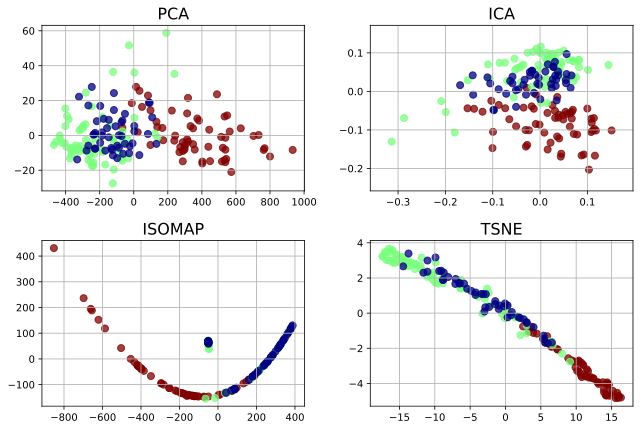

In [10]:
#Aplicando o PCA para transformar os dados de treza para duas dimensões
xPCA = xPCA = PCA(n_components = 2).fit_transform(x)
#Aplicando o FastICA para transformar os dados de treza para duas dimensões
xICA = FastICA(n_components=2).fit_transform(x)
#Aplicando o ISOMAP para transformar os dados de treza para duas dimensões
xISO = Isomap(n_components=2).fit_transform(x)
#Aplicando o TSNE para transformar os dados de treza para duas dimensões
xTSNE = TSNE(n_components=2).fit_transform(x)

#Plotando os quatro ao mesmo tempo para melhor visualização
f, axarr = plt.subplots(2, 2)

axarr[0, 0].scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=y, cmap='jet_r', s=50, alpha=0.75)
axarr[0, 0].set_title('PCA')
axarr[0, 0].grid(True)

axarr[0, 1].scatter(x=xICA[:, 0], y=xICA[:, 1], c=y, cmap='jet_r', s=50, alpha=0.75)
axarr[0, 1].set_title('ICA')
axarr[0, 1].grid(True)

axarr[1, 0].scatter(x=xISO[:, 0], y=xISO[:, 1], c=y, cmap='jet_r', s=50, alpha=0.75)
axarr[1, 0].set_title('ISOMAP')
axarr[1, 0].grid(True)

axarr[1, 1].scatter(x=xTSNE[:, 0], y=xTSNE[:, 1], c=y, cmap='jet_r', s=50, alpha=0.75)
axarr[1, 1].set_title('TSNE')
axarr[1, 1].grid(True)

plt.subplots_adjust(top=1.45, right=1.3, wspace=0.25, hspace=0.3)
plt.show()

#### Considerações sobre redução de dimensionalidade

Nessa seção foram utilizados métodos de redução de dimensionalidade vistos anteriormente no curso. Essa técnica mostra-se necessária já que, infelizmente, não é possível visualizar os dados nas treze dimensões originais.

Observando as quatro técnicas aplicadas, é possível perceber que os dados da classe "Verde Claro" misturam-se muito facilmente com os da classe "Azul Escuro", dando mais um indício de que talvez seja melhor separar os pontos do dataset original em dois clusters.

É importante lembrar que quando forem aplicados os algoritmos de clusterização, todas as treze dimensões serão utilizadas, sem que seja feito uso de qualquer técnica de redução de dimensionalidade. À essas técnicas, reserva-se apenas o objetivo de facilitar a visualização dos dados e dos clusters.

### K-MEANS

Nesse seção, o algoritmo K-Means será utilizado com dois e três clusters, respectivamente, a fim de validar as métricas que foram implementadas em seções anteriores. Além disso, também haverá um teste com oito clusters para que seja feita uma comparação com o algoritmo Affinity Propagation. 

Nas primeiras tentativas de redigir este relatório, utilizou-se o método K-Fold Cross Validation nessa seção a fim de validar os resultados obtidos com o K-Means. Entretanto, houveram muitas variações nos resultados obtidos, de forma que, toda vez que o código era executado, as métricas de Inércia, Silhueta e WB alternavam seus melhores resultados entre o número de clusters utilizado. Sendo assim, mostrou-se necessário buscar outras alternativas de validação cruzada. Por produzir sempre os mesmos resultados, o método Leave One Out foi o escolhido.

#### Executando o K-Means com diferentes número de clusters juntamente com o método de validação cruzada Leave One Out

In [11]:
#Criando as listas que conterão o valor das métricas para cada iteração
vetorInercias2 = []
vetorSilhuetas2 = []
vetorWB2 = []

vetorInercias3 = []
vetorSilhuetas3 = []
vetorWB3 = []

vetorInercias8 = []
vetorSilhuetas8 = []
vetorWB8 = []

#Instanciando o objeto LeaveOneOut
objLeaveOneOut = LeaveOneOut()

for trainIndex, testIndex in objLeaveOneOut.split(x):
    #Instanciando os objetos kMeans com 2, 3 e 8 clusters
    objKMeans2 = KMeans(n_clusters = 2)
    objKMeans3 = KMeans(n_clusters = 3)
    objKMeans8 = KMeans(n_clusters = 8)
    
    #Só serão necessário os dados de treinamento
    xTrain= x[trainIndex]
    yTrain = y[trainIndex]
    
    #Ajustando os dados ao KMeans
    objKMeans2.fit(xTrain)
    objKMeans3.fit(xTrain)
    objKMeans8.fit(xTrain)
    
    #Calculando as métricas
    vetorInercias2.append(objKMeans2.inertia_)
    vetorSilhuetas2.append(metrics.silhouette_score(xTrain, objKMeans2.labels_, metric='euclidean'))
    vetorWB2.append(WBIndex(xTrain, yTrain, objKMeans2.cluster_centers_))
    
    vetorInercias3.append(objKMeans3.inertia_)
    vetorSilhuetas3.append(metrics.silhouette_score(xTrain, objKMeans3.labels_, metric='euclidean'))
    vetorWB3.append(WBIndex(xTrain, yTrain, objKMeans3.cluster_centers_))
    
    vetorInercias8.append(objKMeans8.inertia_)
    vetorSilhuetas8.append(metrics.silhouette_score(xTrain, objKMeans8.labels_, metric='euclidean'))
    vetorWB8.append(WBIndex(xTrain, yTrain, objKMeans8.cluster_centers_))

#### Exibindo os resultados

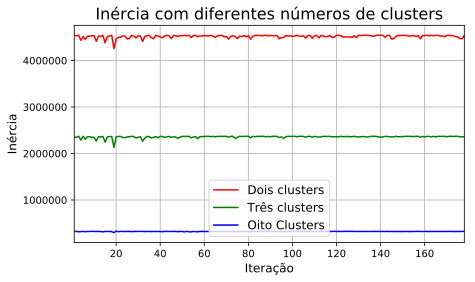

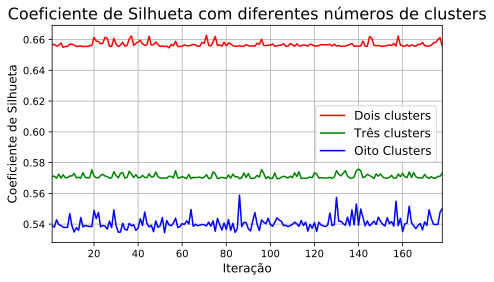

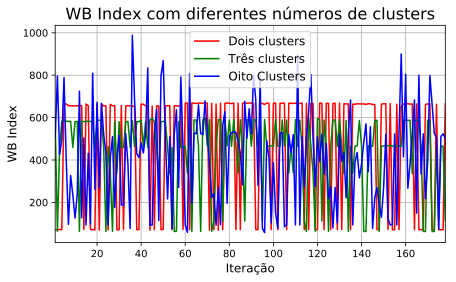

In [12]:
#INÉRCIA
plt.plot(range(1,179), vetorInercias2, color='red', label='Dois clusters')
plt.plot(range(1,179), vetorInercias3, color='green', label='Três clusters')
plt.plot(range(1,179), vetorInercias8, color='blue', label='Oito Clusters')
plt.legend()
plt.title('Inércia com diferentes números de clusters')
plt.xlabel('Iteração')
plt.ylabel('Inércia')
plt.xlim(1,178)
plt.grid()
plt.show()

#SILHUETAS
plt.plot(range(1,179), vetorSilhuetas2, color='red', label='Dois clusters')
plt.plot(range(1,179), vetorSilhuetas3, color='green', label='Três clusters')
plt.plot(range(1,179), vetorSilhuetas8, color='blue', label='Oito Clusters')
plt.legend()
plt.title('Coeficiente de Silhueta com diferentes números de clusters')
plt.xlabel('Iteração')
plt.ylabel('Coeficiente de Silhueta')
plt.xlim(1,178)
plt.grid()
plt.show()

#WBs
plt.plot(range(1,179), vetorWB2, color='red', label='Dois clusters')
plt.plot(range(1,179), vetorWB3, color='green', label='Três clusters')
plt.plot(range(1,179), vetorWB8, color='blue', label='Oito Clusters')
plt.legend()
plt.title('WB Index com diferentes números de clusters')
plt.xlabel('Iteração')
plt.ylabel('WB Index')
plt.xlim(1,178)
plt.grid()
plt.show()

Para facilitar a leitura, a tabela abaixo mostra a média e o desvio padrão de cada métrica para os diferentes números de clusters.

In [13]:
vetorInercias2 = np.array(vetorInercias2)
vetorInercias3 = np.array(vetorInercias3)
vetorInercias8 = np.array(vetorInercias8)
vetorSilhuetas2 = np.array(vetorSilhuetas2)
vetorSilhuetas3 = np.array(vetorSilhuetas3)
vetorSilhuetas8 = np.array(vetorSilhuetas8)
vetorWB2 = np.array(vetorWB2)
vetorWB3 = np.array(vetorWB3)
vetorWB8 = np.array(vetorWB8)
htmlText = ""

htmlText += "<br>"
htmlText += "<br>"
htmlText += "<center>"
htmlText += "<table>"
htmlText += "<tr>"
htmlText += "<th></th>"
htmlText += "<th colspan='2'>DOIS CLUSTERS</th>"
htmlText += "<th colspan='2'>TRÊS CLUSTERS</th>"
htmlText += "<th colspan='2'>OITO CLUSTERS</th>"
htmlText += "</tr>"
htmlText += "<tr>"
htmlText += "<th></th>"
htmlText += "<th>Média</th>"
htmlText += "<th>Desv. Pad</th>"
htmlText += "<th>Média</th>"
htmlText += "<th>Desv. Pad</th>"
htmlText += "<th>Média</th>"
htmlText += "<th>Desv. Pad</th>"
htmlText += "</tr>"
htmlText += "<tr>"
htmlText += "<th>INÉRCIA</th>"
htmlText += "<td>{:.0f}</td>".format(np.mean(vetorInercias2))
htmlText += "<td>{:.0f}</td>".format(np.std(vetorInercias2))
htmlText += "<td>{:.0f}</td>".format(np.mean(vetorInercias3))
htmlText += "<td>{:.0f}</td>".format(np.std(vetorInercias3))
htmlText += "<td>{:.0f}</td>".format(np.mean(vetorInercias8))
htmlText += "<td>{:.0f}</td>".format(np.std(vetorInercias8))
htmlText += "</tr>"
htmlText += "<tr>"
htmlText += "<th>COEF. SILHUETA</th>"
htmlText += "<td>{:.3f}</td>".format(np.mean(vetorSilhuetas2))
htmlText += "<td>{:.3f}</td>".format(np.std(vetorSilhuetas2))
htmlText += "<td>{:.3f}</td>".format(np.mean(vetorSilhuetas3))
htmlText += "<td>{:.3f}</td>".format(np.std(vetorSilhuetas3))
htmlText += "<td>{:.3f}</td>".format(np.mean(vetorSilhuetas8))
htmlText += "<td>{:.3f}</td>".format(np.std(vetorSilhuetas8))
htmlText += "</tr>"
htmlText += "<tr>"
htmlText += "<th>WB INDEX</th>"
htmlText += "<td>{:.0f}</td>".format(np.mean(vetorWB2))
htmlText += "<td>{:.0f}</td>".format(np.std(vetorWB2))
htmlText += "<td>{:.0f}</td>".format(np.mean(vetorWB3))
htmlText += "<td>{:.0f}</td>".format(np.std(vetorWB3))
htmlText += "<td>{:.0f}</td>".format(np.mean(vetorWB8))
htmlText += "<td>{:.0f}</td>".format(np.std(vetorWB8))
htmlText += "</tr>"
htmlText += "</table>"
htmlText += "</center>"

display(HTML(htmlText))

Como mostra a tabela, cada métrica acusou um número ótimo de clusters diferente:

1) A inércia apresentou seu melhor valor quando usados oito clusters (quanto menor a inércia, melhor). 

2) Já o coeficiente de silhueta, quando usados dois clusters (o maior valor é o melhor). 

3) O WB Index, apesar de ter se saído melhor com três clusters, obteve um desvio padrão muito grande. Mesmo assim ainda é possível concluir algo. Ao observar o gráfico, todos os diferentes números de clusters chegaram em um valor mínimo muito parecido. Já quando o valor máximo é observado, percebe-se que os maiores valores são encontrados em azul (oito clusters), seguidos por vermelho (dois clusters) e, por fim, verde (três clusters). Como o melhor WB Index é o menor valor possível, pode-se concluir que essa métrica acusou que o melhor número de clusters é, de fato, três.

#### Utilizando redução de dimensionalidade para visualizar o agrupamento dos dados com deiferentes número de clusters

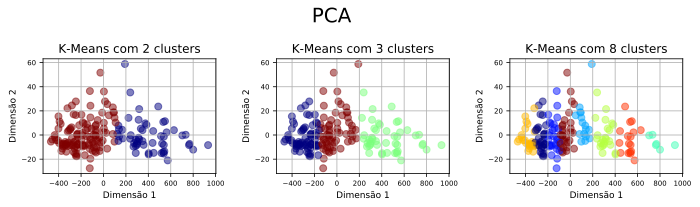

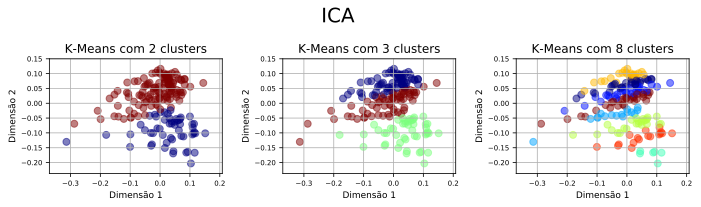

In [14]:
#Usando todos os dados do dataset no kmeans
objKMeans2.fit(x)
objKMeans3.fit(x)
objKMeans8.fit(x)

#Para deixar o subplot bonitinho tem que dar uma melhorada nos parâmetros
params = {'axes.labelsize': 9,
          'axes.titlesize': 12, 
          'xtick.labelsize': 7, 
          'ytick.labelsize': 7
         }

plt.rcParams.update(params)

#PLOTANDO COM PCA--------------------------------------------------------------------------------
f, axarr = plt.subplots(1, 3)

#KMEANS COM 2 CLUSTERS
axarr[0].scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=objKMeans2.labels_, cmap='jet_r', s=50, alpha=0.5)
axarr[0].set_xlabel('Dimensão 1')
axarr[0].set_ylabel('Dimensão 2')
axarr[0].set_title('K-Means com 2 clusters')
axarr[0].grid()

#KMEANS COM 3 CLUSTERS
axarr[1].scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=objKMeans3.labels_, cmap='jet_r', s=50, alpha=0.5)
axarr[1].set_xlabel('Dimensão 1')
axarr[1].set_ylabel('Dimensão 2')
axarr[1].set_title('K-Means com 3 clusters')
axarr[1].grid()

#KMEANS COM 8 CLUSTERS
axarr[2].scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=objKMeans8.labels_, cmap='jet_r', s=50, alpha=0.5)
axarr[2].set_xlabel('Dimensão 1')
axarr[2].set_ylabel('Dimensão 2')
axarr[2].set_title('K-Means com 8 clusters')
axarr[2].grid()

plt.suptitle("PCA", x=0.70, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.subplots_adjust(top=0.80, bottom=0.40, right=1.4, wspace=0.35, hspace=0.3)
plt.show()

#PLOTANDO COM ICA--------------------------------------------------------------------------------
f, axarr = plt.subplots(1, 3)

#KMEANS COM 2 CLUSTERS
axarr[0].scatter(x=xICA[:, 0], y=xICA[:, 1], c=objKMeans2.labels_, cmap='jet_r', s=50, alpha=0.5)
axarr[0].set_xlabel('Dimensão 1')
axarr[0].set_ylabel('Dimensão 2')
axarr[0].set_title('K-Means com 2 clusters')
axarr[0].grid()

#KMEANS COM 3 CLUSTERS
axarr[1].scatter(x=xICA[:, 0], y=xICA[:, 1], c=objKMeans3.labels_, cmap='jet_r', s=50, alpha=0.5)
axarr[1].set_xlabel('Dimensão 1')
axarr[1].set_ylabel('Dimensão 2')
axarr[1].set_title('K-Means com 3 clusters')
axarr[1].grid()

#KMEANS COM 8 CLUSTERS
axarr[2].scatter(x=xICA[:, 0], y=xICA[:, 1], c=objKMeans8.labels_, cmap='jet_r', s=50, alpha=0.5)
axarr[2].set_xlabel('Dimensão 1')
axarr[2].set_ylabel('Dimensão 2')
axarr[2].set_title('K-Means com 8 clusters')
axarr[2].grid()

plt.suptitle("ICA", x=0.70, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.subplots_adjust(top=0.80, bottom=0.40, right=1.4, wspace=0.35, hspace=0.3)
plt.show()

Pode-se perceber pelos gráficos acima que o K-Means produziu agrupamentos com fronteiras bem definidas, situação muito diferente da apresentada pela classificação original, onde as classes se misturavam muito facilmente, como visto anteriormente.

### Índices Externos

Nem sempre é possível conhecer a classificação correta dos dados de um dataset. Porém, no caso do dataset utilizado, sabe-se que apresenta vinhos de TRÊS classes distintas. Ou seja, nesse exercício, pode-se contar com resultados externos, tornando viável a verificação do desempenho da clusterização aplicada nessa base de dados.

Nas células subsequentes, serão utilizadas algumas métricas passíveis de aplicação em se tratando de clusterização quando se conhece a classificação correta dos dados. Mas, primeiro, os dados serão representados em 2D para que se obtenha uma noção visual de como o algorítmo K-Means se saiu.

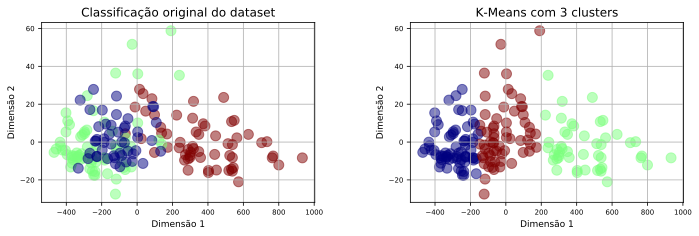

In [15]:
#Plotando os resultados
f, axarr = plt.subplots(1, 2)

#AGRUPAMENTO CORRETO DE ACORDO COM O DATASET
axarr[0].scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=y, cmap='jet_r', s=100, alpha=0.5)
axarr[0].set_xlabel('Dimensão 1')
axarr[0].set_ylabel('Dimensão 2')
axarr[0].set_title('Classificação original do dataset')
axarr[0].grid()

#KMEANS COM 3 CLUSTERS
axarr[1].scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=objKMeans3.labels_, cmap='jet_r', s=100, alpha=0.5)
axarr[1].set_xlabel('Dimensão 1')
axarr[1].set_ylabel('Dimensão 2')
axarr[1].set_title('K-Means com 3 clusters')
axarr[1].grid()

plt.subplots_adjust(top=0.75, right=1.4, wspace=0.35, hspace=0.3)
plt.show()

Como visto anteriormente nesse relatório, na classificação original, os dados da classe "verde claro" misturam-se com os da classe "azul escuro", já com o k-Means isso não acontece. Percebe-se, visualmente, que com o k-Means as classes apresentam fronteiras bem definidas, mesmo quando se usa a redução de dimensionalidade.

#### Matriz de Contingência

Antes de utilizar a função Matriz de Contingência é preciso prestar atenção em algo muito importante:

Na clusterização, não se sabe qual é o "nome" das classes preditas. Isso significa dizer que um algoritmo de clusterização pode separar os dados desse exercício exatamente como estão classificados no dataset original. Entretanto, o algoritmo pode nomear as classes de forma diferente, fazendo com que todos os vinhos "azul escuro", mesmo que classificados 100% corretamente, tornem-se da classe "vermelho". Para verificar isso, basta executar as duas últimas células algumas vezes e perceber que as cores da imagem à direita se alternam.

Portanto, a Matriz de Contingência obtida na figura abaixo pode ser completamente diferente da matriz desejada, mas isso não significa dizer que o resultado da clusterização foi ruim. Na próxima subseção, as "cores" serão re-organizadas para que as classes nomeadas pelo K-Means tenham o mesmo rótulo que a classificação original. Dessa forma, será possível mostrar que, nesse caso, a Matriz de Contingência apresenta os mesmos resultados de uma Matriz de Confusão.

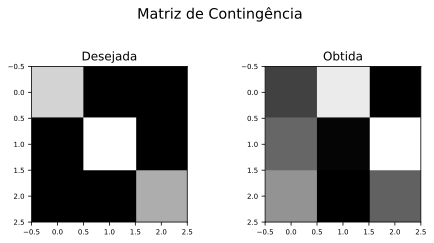

In [16]:
#definindo um subplot 
f, axarr = plt.subplots(1, 2)

#Matriz desejada
axarr[0].imshow(metrics.cluster.contingency_matrix(y, y), cmap='gray')
axarr[0].set_title('Desejada')

#Matriz obtida
axarr[1].imshow(metrics.cluster.contingency_matrix(y, objKMeans3.labels_), cmap='gray')
axarr[1].set_title('Obtida')

plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.suptitle("Matriz de Contingência")
plt.show()

#### Informação Mútua

A informação mútua é uma medida adimensional que calcula quanto uma variável está relacionada à outra. Está relacionada à entropia das duas variáveis de entrada. Quanto maior a Informação Mútua, mais as duas variáveis estão relacionadas, de forma que a informação contida em uma permite reduzir ao máximo a incerteza quanto aos valores da segunda variável. 

O conceito de Informação Mútua está intimamente ligado ao de Entropia:

I(x,y) = H(x) - H(x|y)

Referências: 

https://en.wikipedia.org/wiki/Mutual_information

http://www.scholarpedia.org/article/Mutual_information

In [17]:
print("Informação mútua desejada:", metrics.mutual_info_score(y, y))
print("Informação mútua obtida:", metrics.mutual_info_score(y, objKMeans3.labels_))

Informação mútua desejada: 1.0860384436406825
Informação mútua obtida: 0.4657066646034707


#### Re-organizando as cores

Aqui, o objetivo é fazer com que os rótulos das classes preditas e originais sejam iguais, ou seja, garantir que a classe "azul escuro" para o K-Means signifique a mesma coisa para a classificação original do dataset. É claro que a classificação segue os rótulos "0", "1" e "2". Mas, para tornar a explicação mais intuitiva, prefere-se usar os rótulos "vermelho", "verde claro" e "azul escuro", assim como os dados têm sido exibidos em 2D.

Nesse relátorio, para garantir que as classes fossem equivalentes no dataset original e na predição do K-Means, as células antipenúltima e penúltima foram executadas até que as cores fossem iguais. Depois, o valor de **objKMeans3.labels_** foi copiado para que fosse colocado no vetor **yKMeans3**, abaixo.

Aqui, como o nome das classes preditas é igual ao das classes originais, a Matriz de Contingência fica igual à Matriz de Confusão usada nos exercícios anteriores de Classificação.

In [18]:
#criando o novo vetor com os clusters re-organizados
#esse vetor é similar ao objKMeans3.labels_, porém, 
#aqui é garantido que os labels serão equivalentes no dataset original e no predito pelo kmeans
yKMeans3 = [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1]

Verificando a equivalência entre as cores (classes):

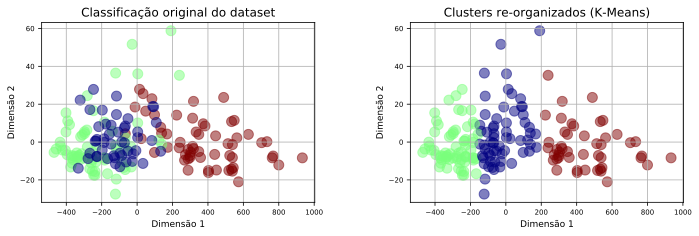

In [19]:
#Plotando os resultados
f, axarr = plt.subplots(1, 2)

#AGRUPAMENTO CORRETO DE ACORDO COM O DATASET
axarr[0].scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=y, cmap='jet_r', s=100, alpha=0.5)
axarr[0].set_xlabel('Dimensão 1')
axarr[0].set_ylabel('Dimensão 2')
axarr[0].set_title('Classificação original do dataset')
axarr[0].grid()

#KMEANS COM 3 CLUSTERS
axarr[1].scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=yKMeans3, cmap='jet_r', s=100, alpha=0.5)
axarr[1].set_xlabel('Dimensão 1')
axarr[1].set_ylabel('Dimensão 2')
axarr[1].set_title('Clusters re-organizados (K-Means)')
axarr[1].grid()

plt.subplots_adjust(top=0.75, right=1.4, wspace=0.35, hspace=0.3)
plt.show()

Agora, é possível mostrar que as matrizes de Confusão e de Contingência são análogas quando usado o vetor **yKMeans3**.

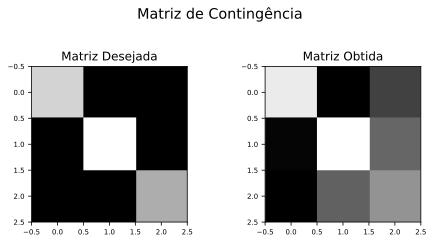

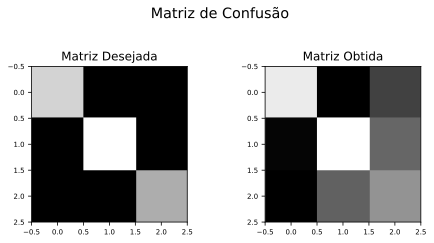

In [20]:
#SUBPLOT DA CONTINGÊNCIA
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(metrics.cluster.contingency_matrix(y, y), cmap='gray')
axarr[1].imshow(metrics.cluster.contingency_matrix(y, yKMeans3), cmap='gray')
plt.suptitle("Matriz de Contingência")
axarr[0].set_title('Matriz Desejada')
axarr[1].set_title('Matriz Obtida')
plt.subplots_adjust(wspace=0.5)
plt.show()

#SUBPLOT DA CONTINGÊNCIA
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(metrics.confusion_matrix(y, y), cmap='gray')
axarr[1].imshow(metrics.confusion_matrix(y, yKMeans3), cmap='gray')
plt.suptitle("Matriz de Confusão")
axarr[0].set_title('Matriz Desejada')
axarr[1].set_title('Matriz Obtida')
plt.subplots_adjust(wspace=0.5)
plt.show()

#### Outras métricas de classificação

Ainda é possível utilizar outras métricas de classificação para demonstrar como o K-Means se saiu. Dessa forma, é possível estabelecer uma relação entre Classificação e Clusterização.

##### Acurácia

In [21]:
print("{:.2f}%".format(100 * metrics.accuracy_score(y, yKMeans3)))

70.22%


##### Precisão, Recall e F1-Score de cada classe

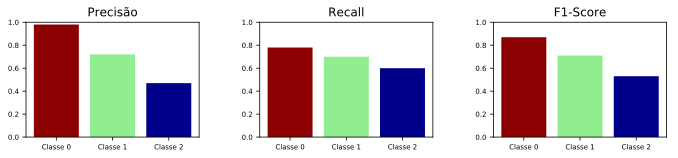

In [22]:
#Report é uma string contendo precisão, recall e f1-score de cada classe
report = metrics.classification_report(y, yKMeans3)

#Separando a string
vetorReport = report.split()

#Guardando a precisão de cada classe
vetorPrecisao = []
vetorPrecisao.append(vetorReport[5])
vetorPrecisao.append(vetorReport[10])
vetorPrecisao.append(vetorReport[15])

#Guardando o recall de cada classe
vetorRecall = []
vetorRecall.append(vetorReport[6])
vetorRecall.append(vetorReport[11])
vetorRecall.append(vetorReport[16])

#Guardando o f1-score de cada classe
vetorF1Score = []
vetorF1Score.append(vetorReport[7])
vetorF1Score.append(vetorReport[12])
vetorF1Score.append(vetorReport[17])

#Convertendo as listas pra floats
vetorPrecisao = [float(i) for i in vetorPrecisao]
vetorRecall = [float(i) for i in vetorRecall]
vetorF1Score = [float(i) for i in vetorF1Score]

#PLOTANDO AS MÉTRICAS
f, axarr = plt.subplots(1, 3)

#PRECISÃO
axarr[0].bar(["Classe 0","Classe 1","Classe 2"], vetorPrecisao, color=("darkred", "lightgreen", "darkblue"))
axarr[0].set_title("Precisão")
axarr[0].set_ylim(0,1)

#RECALL
axarr[1].bar(["Classe 0","Classe 1","Classe 2"], vetorRecall, color=("darkred", "lightgreen", "darkblue"))
axarr[1].set_title("Recall")
axarr[1].set_ylim(0,1)

#F1
axarr[2].bar(["Classe 0","Classe 1","Classe 2"], vetorF1Score, color=("darkred", "lightgreen", "darkblue"))
axarr[2].set_title("F1-Score")
axarr[2].set_ylim(0,1)

plt.subplots_adjust(top=0.80, bottom=0.40, right=1.4, wspace=0.35, hspace=0.3)
plt.show()

Os gráficos acima reforçam a ideia já exposta nesse relatório de que as classes "azul escuro" e "verde claro" confundem-se demais no dataset original. Se a separação entre essas classes fosse mais nítida, as pontuações de ambas seriam maiores, assim como as da classe "vermelho".

### Affinity Propagation

Nessa seção, o algoritmo Affinity Propagation será executado com o método de validação cruzada K-Fold. Os dados serão divididos em diferentes quantidades de pacotes.

É válido lembrar que a cada iteraçã do K-Fold, um pacote diferente é selecionado para teste e o restante para treinamento. 

Os gráficos serão exibidos apenas para verificar se o algoritmo abaixo está rodando corretamente. Posteriormente será monstada uma tabela para melhor visualização dos resultados.

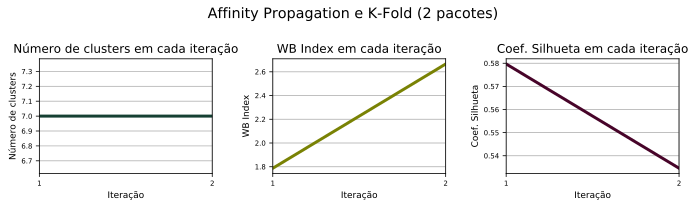

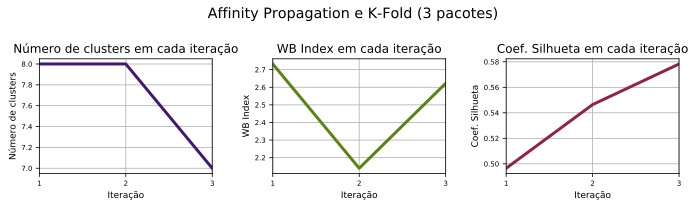

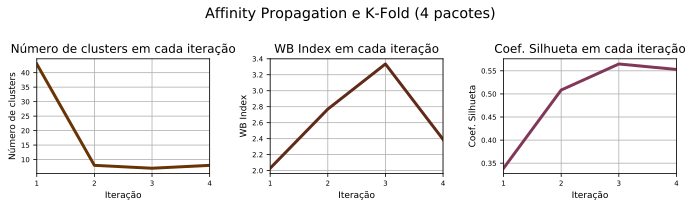

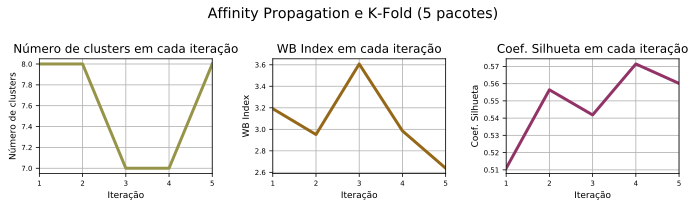

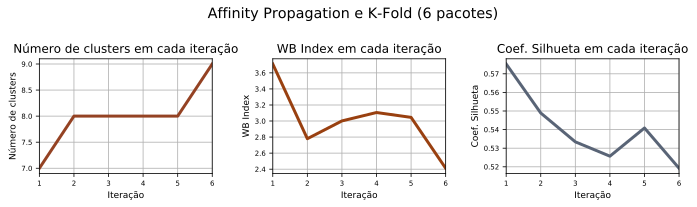

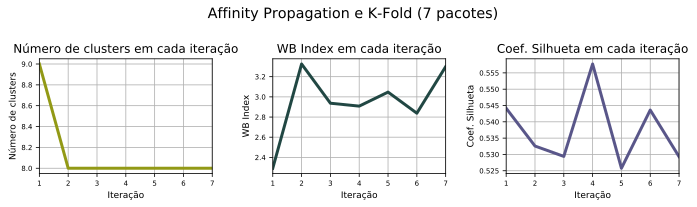

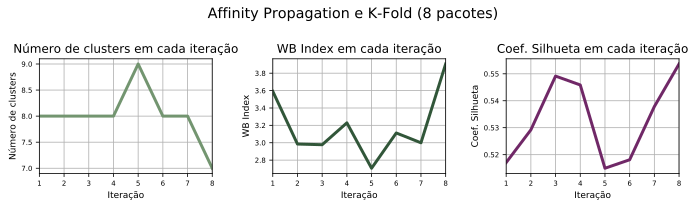

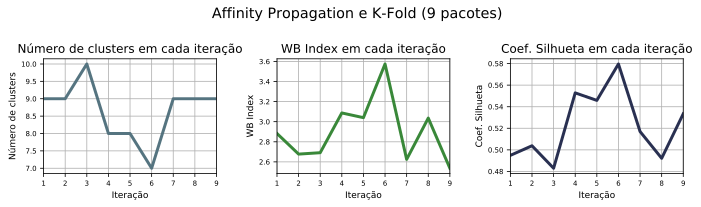

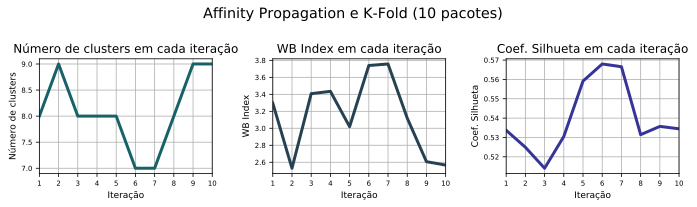

In [23]:
#rodando o kfold de 2 a 10 pacotes
vetorQtdPacotes = np.arange(2,11)

#pra exibir os dados depois em tabela, vou fazer essa matriz
matrizAP = []

for qtdPacotes in vetorQtdPacotes:
    #Instânciando um objeto KFold com qtdPacotes
    objKFold = KFold(n_splits = qtdPacotes, shuffle=True, random_state=None)

    #Vetor que vai guardar quantos clusters foram usados em cada iteração
    vetorQtdClusters = []
    vetorWBs = []
    vetorSilhuetas = []

    #Rodando o Affinity Propagation
    i = 0
    for trainIndex, testIndex in objKFold.split(x):
        xTrain = x[trainIndex]
        objAP = AffinityPropagation().fit(xTrain)
        vetorQtdClusters.append(len(objAP.cluster_centers_indices_))
        vetorWBs.append(WBIndex(xTrain, objAP.labels_, objAP.cluster_centers_))
        vetorSilhuetas.append(metrics.silhouette_score(xTrain, objAP.labels_, metric='euclidean'))
        #colocando os dados na matriz
        linhaNovaMatriz = []
        linhaNovaMatriz.append(vetorQtdClusters[i])
        linhaNovaMatriz.append(vetorWBs[i])
        linhaNovaMatriz.append(vetorSilhuetas[i])
        matrizAP.append(linhaNovaMatriz)
        i += 1

    #Plotando
    f, axarr = plt.subplots(1, 3)
    xTicksInt = np.arange(1, qtdPacotes+1)
    xTicksStr = xTicksInt.astype('U')
    
    #cores aleatórias
    cor1 = "#" + str(randint(100000,999999))
    cor2 = "#" + str(randint(100000,999999))
    cor3 = "#" + str(randint(100000,999999))

    #Número de clusters utilizados
    axarr[0].plot(range(1,qtdPacotes+1), vetorQtdClusters, color=cor1, linewidth=3)
    axarr[0].set_xlabel('Iteração')
    axarr[0].set_ylabel('Número de clusters')
    axarr[0].set_title('Número de clusters em cada iteração')
    axarr[0].grid()
    axarr[0].set_xlim(1,qtdPacotes)
    axarr[0].set_xticks(xTicksInt)
    axarr[0].set_xticklabels(xTicksStr)

    #WB
    axarr[1].plot(range(1,qtdPacotes+1), vetorWBs, color=cor2, linewidth=3)
    axarr[1].set_xlabel('Iteração')
    axarr[1].set_ylabel('WB Index')
    axarr[1].set_title('WB Index em cada iteração')
    axarr[1].grid()
    axarr[1].set_xlim(1,qtdPacotes)
    axarr[1].set_xticks(xTicksInt)
    axarr[1].set_xticklabels(xTicksStr)

    #Silhueta
    axarr[2].plot(range(1,qtdPacotes+1), vetorSilhuetas, color=cor3, linewidth=3)
    axarr[2].set_xlabel('Iteração')
    axarr[2].set_ylabel('Coef. Silhueta')
    axarr[2].set_title('Coef. Silhueta em cada iteração')
    axarr[2].grid()
    axarr[2].set_xlim(1,qtdPacotes)
    axarr[2].set_xticks(xTicksInt)
    axarr[2].set_xticklabels(xTicksStr)

    titulo = "Affinity Propagation e K-Fold (" + str(qtdPacotes) + " pacotes)"
    plt.suptitle(titulo, x=0.75, horizontalalignment='center', verticalalignment='top')
    plt.subplots_adjust(top=0.80, bottom=0.40, right=1.4, wspace=0.35, hspace=0.3) 
    plt.show()

#### Visualizando os resultados

In [24]:
#Aqui é um algoritmo pra fazer a matriz que vai ser exibida

matrizAP = np.array(matrizAP)
matrizQueVaiSerExibida = []

#Para cada número de clusters usado...
for numeroDeClusters in [7,8,9]:
    #...eu corto a matrizAP deixando as linhas que tem o número de clusters que eu quero
    matrizXClusters = [linha for linha in matrizAP if linha[0] == numeroDeClusters]
    matrizXClusters = np.array(matrizXClusters)
    
    #ai eu faço uma linha com a média e o dp de cada métrica
    linhaXClusters = []
    linhaXClusters.append(numeroDeClusters)
    linhaXClusters.append(np.mean(matrizXClusters[:,1]))
    linhaXClusters.append(np.std(matrizXClusters[:,1]))
    linhaXClusters.append(np.mean(matrizXClusters[:,2]))
    linhaXClusters.append(np.std(matrizXClusters[:,2]))
    linhaXClusters.append(len(matrizXClusters[:,0]))
    
    #e coloco na matriz que vai ser exibida
    matrizQueVaiSerExibida.append(linhaXClusters)
    
#Printando os dados
htmlText = ""
htmlText += "<br>"
htmlText += "<br>"
htmlText += "<center>"
htmlText += "<table>"
htmlText += "<tr>"
htmlText += "<th rowspan='2'>Nº DE CLUSTERS</th>"
htmlText += "<th colspan='2'>WB INDEX</th>"
htmlText += "<th colspan='2'>COEFICIENTE DE SILHUETA</th>"
htmlText += "<th rowspan='2'>QTD ITERAÇÕES</th>"
htmlText += "</tr>"
htmlText += "<tr>"
htmlText += "<td>Média</td>"
htmlText += "<td>Desvio Padrão</td>"
htmlText += "<td>Média</td>"
htmlText += "<td>Desvio Padrão</td>"
htmlText += "</tr>"
htmlText += "<tr>"
htmlText += "<td>{:.0f}</td>".format(matrizQueVaiSerExibida[0][0])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[0][1])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[0][2])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[0][3])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[0][4])
htmlText += "<td>{:.0f}</td>".format(matrizQueVaiSerExibida[0][5])
htmlText += "</tr>"
htmlText += "<tr>"
htmlText += "<td>{:.0f}</td>".format(matrizQueVaiSerExibida[1][0])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[1][1])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[1][2])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[1][3])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[1][4])
htmlText += "<td>{:.0f}</td>".format(matrizQueVaiSerExibida[1][5])
htmlText += "</tr>"
htmlText += "<tr>"
htmlText += "<td>{:.0f}</td>".format(matrizQueVaiSerExibida[2][0])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[2][1])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[2][2])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[2][3])
htmlText += "<td>{:.3f}</td>".format(matrizQueVaiSerExibida[2][4])
htmlText += "<td>{:.0f}</td>".format(matrizQueVaiSerExibida[2][5])
htmlText += "</tr>"
htmlText += "</table>"
htmlText += "</center>"

display(HTML(htmlText))

Como mostra a tabela, na maior parte das vezes o Affinity Propagation utiliza oito clusters nessa base de dados, como previsto anteriormente.

As duas métricas utilizadas divergem quanto ao número ótimo de clusters. O melhor resultado obtido pelo WB Index se deu com nove agrupamentos. Já o Coeficiente de Silhueta se saiu melhor com sete clusters.

### Comparação entre Affinity Propagation e K-Means

Nessa seção as métricas Coefieciente de Silhueta e WB INdex serão usadas para comparar os algoritmos Affinity Propagation e K-Means. A comparação será feita com uma quantidade aleatória de iterações entre 5 e 15. Em cada iteração os dados serão separados com Train Test Split, reservando um percentual randômico para os dados de teste entre 15% e 35%. Além disso, deve-se garantir que os algoritmos sejam rodados com oito clusters.

Dados reservados para teste: 24.00%
Quantidade de iterações: 10


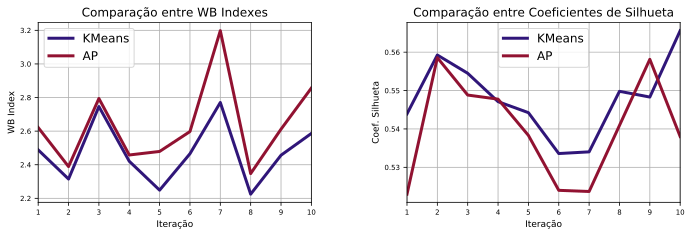

In [25]:
#Criando os vetores que conterão as métricas
silhuetasKMeans = []
silhuetasAP = []
WBsKMeans = []
WBsAP = []

#Randomizando a quantidade de iterações e test_size
qtdIteracoes = randint(5,15)
testSize = randint(15,35) / 100

print("Dados reservados para teste: {:.2f}%".format(testSize * 100))
print("Quantidade de iterações:", qtdIteracoes)

for i in range(0,qtdIteracoes):
    #Separando os dados de treinamento e teste
    xTrain, xTest, yTrain, yTest = tts(x, y, test_size=testSize, shuffle=True)
    objAP = AffinityPropagation().fit(xTrain)
    
    #Garantindo que o AP vai usar 8 clusters
    while len(objAP.cluster_centers_indices_) != 8:
        xTrain, xTest, yTrain, yTest = tts(x, y, test_size=testSize, shuffle=True)
        objAP = AffinityPropagation().fit(xTrain)
        
    #instanciando um obj KMeans também
    objKMeans = KMeans(n_clusters = 8)
    objKMeans.fit(xTrain)
    
    #Calculando as métricas para o KMeans
    WBsKMeans.append(WBIndex(xTrain, objKMeans.labels_, objKMeans.cluster_centers_))
    silhuetasKMeans.append(metrics.silhouette_score(xTrain, objKMeans.labels_, metric='euclidean'))
    
    #Calculando as métricas para o AP
    WBsAP.append(WBIndex(xTrain, objAP.labels_, objAP.cluster_centers_))
    silhuetasAP.append(metrics.silhouette_score(xTrain, objAP.labels_, metric='euclidean'))
    
#Plotando os resultados
f, axarr = plt.subplots(1, 2)

corKMeans = "#" + str(randint(100000,999999))
corAP = "#" + str(randint(100000,999999))

xTicksInt = np.arange(1, qtdIteracoes+1)
xTicksStr = xTicksInt.astype('U')

#WB Index
axarr[0].plot(range(1,qtdIteracoes+1), WBsKMeans, color="#301679", linewidth=3, label="KMeans")
axarr[0].plot(range(1,qtdIteracoes+1), WBsAP, color="#911231", linewidth=3, label="AP")
axarr[0].set_xlabel('Iteração')
axarr[0].set_ylabel('WB Index')
axarr[0].set_title("Comparação entre WB Indexes")
axarr[0].set_xlim(1,qtdIteracoes)
axarr[0].set_xticks(xTicksInt)
axarr[0].set_xticklabels(xTicksStr)
axarr[0].grid()
axarr[0].legend()

#Silhuetas
axarr[1].plot(range(1,qtdIteracoes+1), silhuetasKMeans, color="#301679", linewidth=3, label="KMeans")
axarr[1].plot(range(1,qtdIteracoes+1), silhuetasAP, color="#911231", linewidth=3, label="AP")
axarr[1].set_xlabel('Iteração')
axarr[1].set_ylabel('Coef. Silhueta')
axarr[1].set_title('Comparação entre Coeficientes de Silhueta')
axarr[1].set_xlim(1,qtdIteracoes)
axarr[1].set_xticks(xTicksInt)
axarr[1].set_xticklabels(xTicksStr)
axarr[1].grid()
axarr[1].legend()

plt.subplots_adjust(top=0.75, right=1.4, wspace=0.35, hspace=0.3)
plt.show()

#tabela
htmlText = ""
htmlText += "<br>"
htmlText += "<br>"
htmlText += "<center>"
htmlText += "<table>"
htmlText += "<tr>"
htmlText += "<th></th>"
htmlText += "<th colspan='2'>WB Index</th>"
htmlText += "<th colspan='2'>Coeficiente de Silhueta</th>"
htmlText += "</tr>"
htmlText += "<tr>"
htmlText += "<th></th>"
htmlText += "<th>Média</th>"
htmlText += "<th>Desv. Pad</th>"
htmlText += "<th>Média</th>"
htmlText += "<th>Desv. Pad</th>"
htmlText += "</tr>"
htmlText += "<tr>"
htmlText += "<th>K-Means</th>"
htmlText += "<td>{:.3f}</td>".format(np.mean(WBsKMeans))
htmlText += "<td>{:.3f}</td>".format(np.std(WBsKMeans))
htmlText += "<td>{:.3f}</td>".format(np.mean(silhuetasKMeans))
htmlText += "<td>{:.3f}</td>".format(np.std(silhuetasKMeans))
htmlText += "</tr>"
htmlText += "<tr>"
htmlText += "<th>Affinity Propagation</th>"
htmlText += "<td>{:.3f}</td>".format(np.mean(WBsAP))
htmlText += "<td>{:.3f}</td>".format(np.std(WBsAP))
htmlText += "<td>{:.3f}</td>".format(np.mean(silhuetasAP))
htmlText += "<td>{:.3f}</td>".format(np.std(silhuetasAP))
htmlText += "</tr>"
htmlText += "</table>"
htmlText += "</center>"

display(HTML(htmlText))

Como é possível perceber pelo gráfico e pela tabela, o K-Means obteve resultados melhores em ambas as métricas utilizadas para a comparação. Isto é, WB Index menor e Coeficiente de Silhueta maior.

## Discussão sobre os resultados

#### Sobre os objetivos gerais

Por meio desse exercício computacional, possibilitou-se estudar os algoritmos K-Means e Affinity Propagation, além de aplicar diversas métricas usadas em técnicas de clusterização.

Em um primeiro momento, utilizaram-se as métricas Elbow Method, Coeficiente de Silhueta e WB Index para tentar identificar o número ótimo de clusters para a base de dados utilizada. Empregou-se também o Affinity Propagation para verificar quantos clusters eram utilizados para agrupar os dados. Como o WB Index não estava implementado na biblioteca Scikit-Learn, foi necessário buscar artigos que descrevessem o passo a passo do algoritmo para que ele pudesse ser desenvolvido nesse exercício.

Depois disso, buscou-se examinar o desempenho do K-Means com diferentes números de clusters. Novamente, as métricas de Coeficiente de Silhueta e WB Index foram utilizadas nessa tarefa, juntamente com a Inércia. Além disso, por conhecer as classes originais do dataset, permitiu-se abordar métricas de índices externos, como a Matriz de Contingência e Informação Mútua. A partir daí, avaliou-se a performance do K-Means como um classificador, onde foi possível usar a Acurácia, Matriz de Confusão, Precisão, Recall e F1-Score.

O Affinity Propagation foi o último algoritmo de clusterização experimentado. Para testá-lo, fez-se uso das métricas WB Index e Coeficiente de Silhueta. Por fim, mostrou-se oportuno compara-lo com o K-Means quando utilizado o mesmo número de clusters.

Portanto, pôde-se concluir que o objetivo principal de estudar os algoritmos de clusterização e suas métricas foi atingido.

#### Sobre os resultados obtidos

Inicialmente, verificou-se que a melhor maneira de separar os dados do dataset seria dividindo-os em dois grupos distintos. Esse número foi acusado pelos métodos de Coeficiente de Silhueta, WB Index e Elbow Method, sendo que, apenas o Affinity Propagation entrou em desacordo, utilizando oito clusters na maioria das vezes em que era executado.

O primeiro algoritmo de clusterização estudado foi o K-Means, usando dois, três e oito clusters, respectivamente. As três métricas utilizadas para avaliá-lo produziram resultados diferentes: a Inércia expressou seu melhor resultado com oito clusters; O Coeficiente de Silhueta, com dois; e o WB Index, com três. Portanto, preferiu-se partir para uma abordagem que utilizasse métricas de índices externos, isto é, métricas utilizadas quando se conhece a classificação original do dataset. 

Quando o K-Means foi comparado a um classificador, obteve acurácia próxima de 70% e precisão de quase 100% na classe 0 (vermelha), resultados muito expressivos por se tratar de um algoritmo de clusterização.

Por último, quando feita a comparação entre o K-Means e o Affinity Propagation com oito clusters, percebeu-se, claramente, que o K-Means obteve um resultado notóriamente superior.

In [26]:
vetorNumeros = [1,2,3,4,5,6,7,8,9]
vetorPares = [valor for valor in(vetorNumeros) if valor % 2 == 0]

In [27]:
vetorNumeros

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [28]:
vetorPares

[2, 4, 6, 8]

## Referências

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/

https://pythonprogramminglanguage.com/kmeans-elbow-method/

https://en.wikipedia.org/wiki/Elbow_method_(clustering)

https://stats.stackexchange.com/questions/78313/clustering-inertia-formula-in-scikit-learn

https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

https://en.wikipedia.org/wiki/Silhouette_(clustering)

https://medium.com/@aneesha/using-affinity-propagation-to-find-the-number-of-clusters-in-a-dataset-52f5dd3b0760

http://cs.joensuu.fi/sipu/pub/qinpei-thesis.pdf

https://en.wikipedia.org/wiki/Mutual_information

http://www.scholarpedia.org/article/Mutual_information